# Limpieza de Datos Climaticos Nivel Municipal NASA-API

En este punto, se procede a realizar la depuración de los datos relativos a las variables climáticas correspondientes a los municipios de México, que se obtuvieron de la API de la NASA.

Para llevar a cabo esta tarea, se realizarán las siguientes etapas:

- Exploración de los Datos: Se realizará una revisión inicial de los datos para identificar posibles inconsistencias o datos faltantes que requieran atención.

- Limpieza de Datos Faltantes: Los registros que contengan datos faltantes o nulos serán evaluados y, en la medida de lo posible, se completarán o se eliminarán de la base de datos, dependiendo de su relevancia para el análisis.

### Importación de Librerías

In [7]:
import numpy as np
import os
import pandas as pd
import missingno as msno
pd.set_option('display.max_columns', None)

### Directorio de Trabajo

In [22]:
# Obtención de la ruta
actual_dir = os.getcwd()
ext_dir = os.path.dirname(actual_dir)
subdir1 = '/descarga'
subdir2 = '/data/'
data_processed = subdir1 + subdir2 + 'Municipios/'
dir = ext_dir + data_processed

In [23]:
# Leer DF
df = pd.read_csv(dir + 'Data_Climatic_Municipios_Concat.csv', low_memory=False)
df

,Estado,Municipio,Estado_CVE,Municipio_CVE,Año,Mes,Día,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Flujo_Evapotranspiración,Perfil_Humedad_Suelo,Dias_Sin_Nubosidad,Precipitacion,Horas_De_Sol,Insolacion_Mediodia
0,Aguascalientes,El Llano,1,10,2020,1,1,12.91,23.01,6.02,12.88,19.87,7.19,7.03,9.95,78.76,5.12,69.81,0.01,0.50,0.0,13.81,10.0,12.09
1,Aguascalientes,El Llano,1,10,2020,1,2,11.03,19.21,3.86,10.91,16.86,5.05,6.05,8.48,78.48,6.74,74.31,0.01,0.51,0.0,5.85,10.0,14.65
2,Aguascalientes,El Llano,1,10,2020,1,3,8.24,21.95,0.26,8.14,18.27,1.51,-1.43,3.36,79.02,3.66,59.56,0.02,0.51,1.0,0.02,10.0,19.79
3,Aguascalientes,El Llano,1,10,2020,1,4,6.03,20.34,-3.12,5.65,16.12,-1.79,-6.48,-0.42,79.68,3.70,49.56,0.01,0.51,0.0,0.00,10.0,16.03
4,Aguascalientes,El Llano,1,10,2020,1,5,6.23,22.62,-4.48,6.79,18.73,-1.85,-7.67,-0.44,79.60,3.02,42.12,0.02,0.51,1.0,0.00,10.0,19.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446111,Ciudad de México,Milpa Alta,9,9,2023,10,29,17.36,26.55,11.39,17.51,23.84,12.43,13.53,15.52,79.16,0.81,79.31,-999.00,-999.00,-999.0,1.07,-999.0,-999.00
3446112,Ciudad de México,Milpa Alta,9,9,2023,10,30,16.24,24.74,10.30,16.44,22.36,11.41,11.78,14.11,79.20,1.09,76.50,-999.00,-999.00,-999.0,0.08,-999.0,-999.00
3446113,Ciudad de México,Milpa Alta,9,9,2023,10,31,15.48,24.34,9.40,15.36,21.87,10.44,11.56,13.46,79.28,1.26,79.75,-999.00,-999.00,-999.0,0.89,-999.0,-999.00
3446114,Ciudad de México,Milpa Alta,9,9,2023,11,1,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00,-999.0,-999.00,-999.0,-999.00


In [24]:
# Establecer columnas NaN
df.replace(-999.00, np.nan, inplace=True)
df

,Estado,Municipio,Estado_CVE,Municipio_CVE,Año,Mes,Día,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Flujo_Evapotranspiración,Perfil_Humedad_Suelo,Dias_Sin_Nubosidad,Precipitacion,Horas_De_Sol,Insolacion_Mediodia
0,Aguascalientes,El Llano,1,10,2020,1,1,12.91,23.01,6.02,12.88,19.87,7.19,7.03,9.95,78.76,5.12,69.81,0.01,0.50,0.0,13.81,10.0,12.09
1,Aguascalientes,El Llano,1,10,2020,1,2,11.03,19.21,3.86,10.91,16.86,5.05,6.05,8.48,78.48,6.74,74.31,0.01,0.51,0.0,5.85,10.0,14.65
2,Aguascalientes,El Llano,1,10,2020,1,3,8.24,21.95,0.26,8.14,18.27,1.51,-1.43,3.36,79.02,3.66,59.56,0.02,0.51,1.0,0.02,10.0,19.79
3,Aguascalientes,El Llano,1,10,2020,1,4,6.03,20.34,-3.12,5.65,16.12,-1.79,-6.48,-0.42,79.68,3.70,49.56,0.01,0.51,0.0,0.00,10.0,16.03
4,Aguascalientes,El Llano,1,10,2020,1,5,6.23,22.62,-4.48,6.79,18.73,-1.85,-7.67,-0.44,79.60,3.02,42.12,0.02,0.51,1.0,0.00,10.0,19.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3446111,Ciudad de México,Milpa Alta,9,9,2023,10,29,17.36,26.55,11.39,17.51,23.84,12.43,13.53,15.52,79.16,0.81,79.31,NaN,NaN,NaN,1.07,NaN,NaN
3446112,Ciudad de México,Milpa Alta,9,9,2023,10,30,16.24,24.74,10.30,16.44,22.36,11.41,11.78,14.11,79.20,1.09,76.50,NaN,NaN,NaN,0.08,NaN,NaN
3446113,Ciudad de México,Milpa Alta,9,9,2023,10,31,15.48,24.34,9.40,15.36,21.87,10.44,11.56,13.46,79.28,1.26,79.75,NaN,NaN,NaN,0.89,NaN,NaN
3446114,Ciudad de México,Milpa Alta,9,9,2023,11,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Limpieza

Las variables **Flujo_Evapotranspiración, Perfil_Humedad_Suelo, Dias_Sin_Nubosidad, Horas_De_Sol, Insolacion_Mediodi** son las que tienen mayor cantidad de datos faltantes, por lo que se procederá a evaluarlas y, en la medida de lo posible, completarlas o eliminarlas. Aunqeu estas variables se consideran relevantes para el análisis que se realizará, se considera que la cantidad de datos faltantes es demasiado alta para poder completarlos con datos de otras fuentes.

<AxesSubplot: >

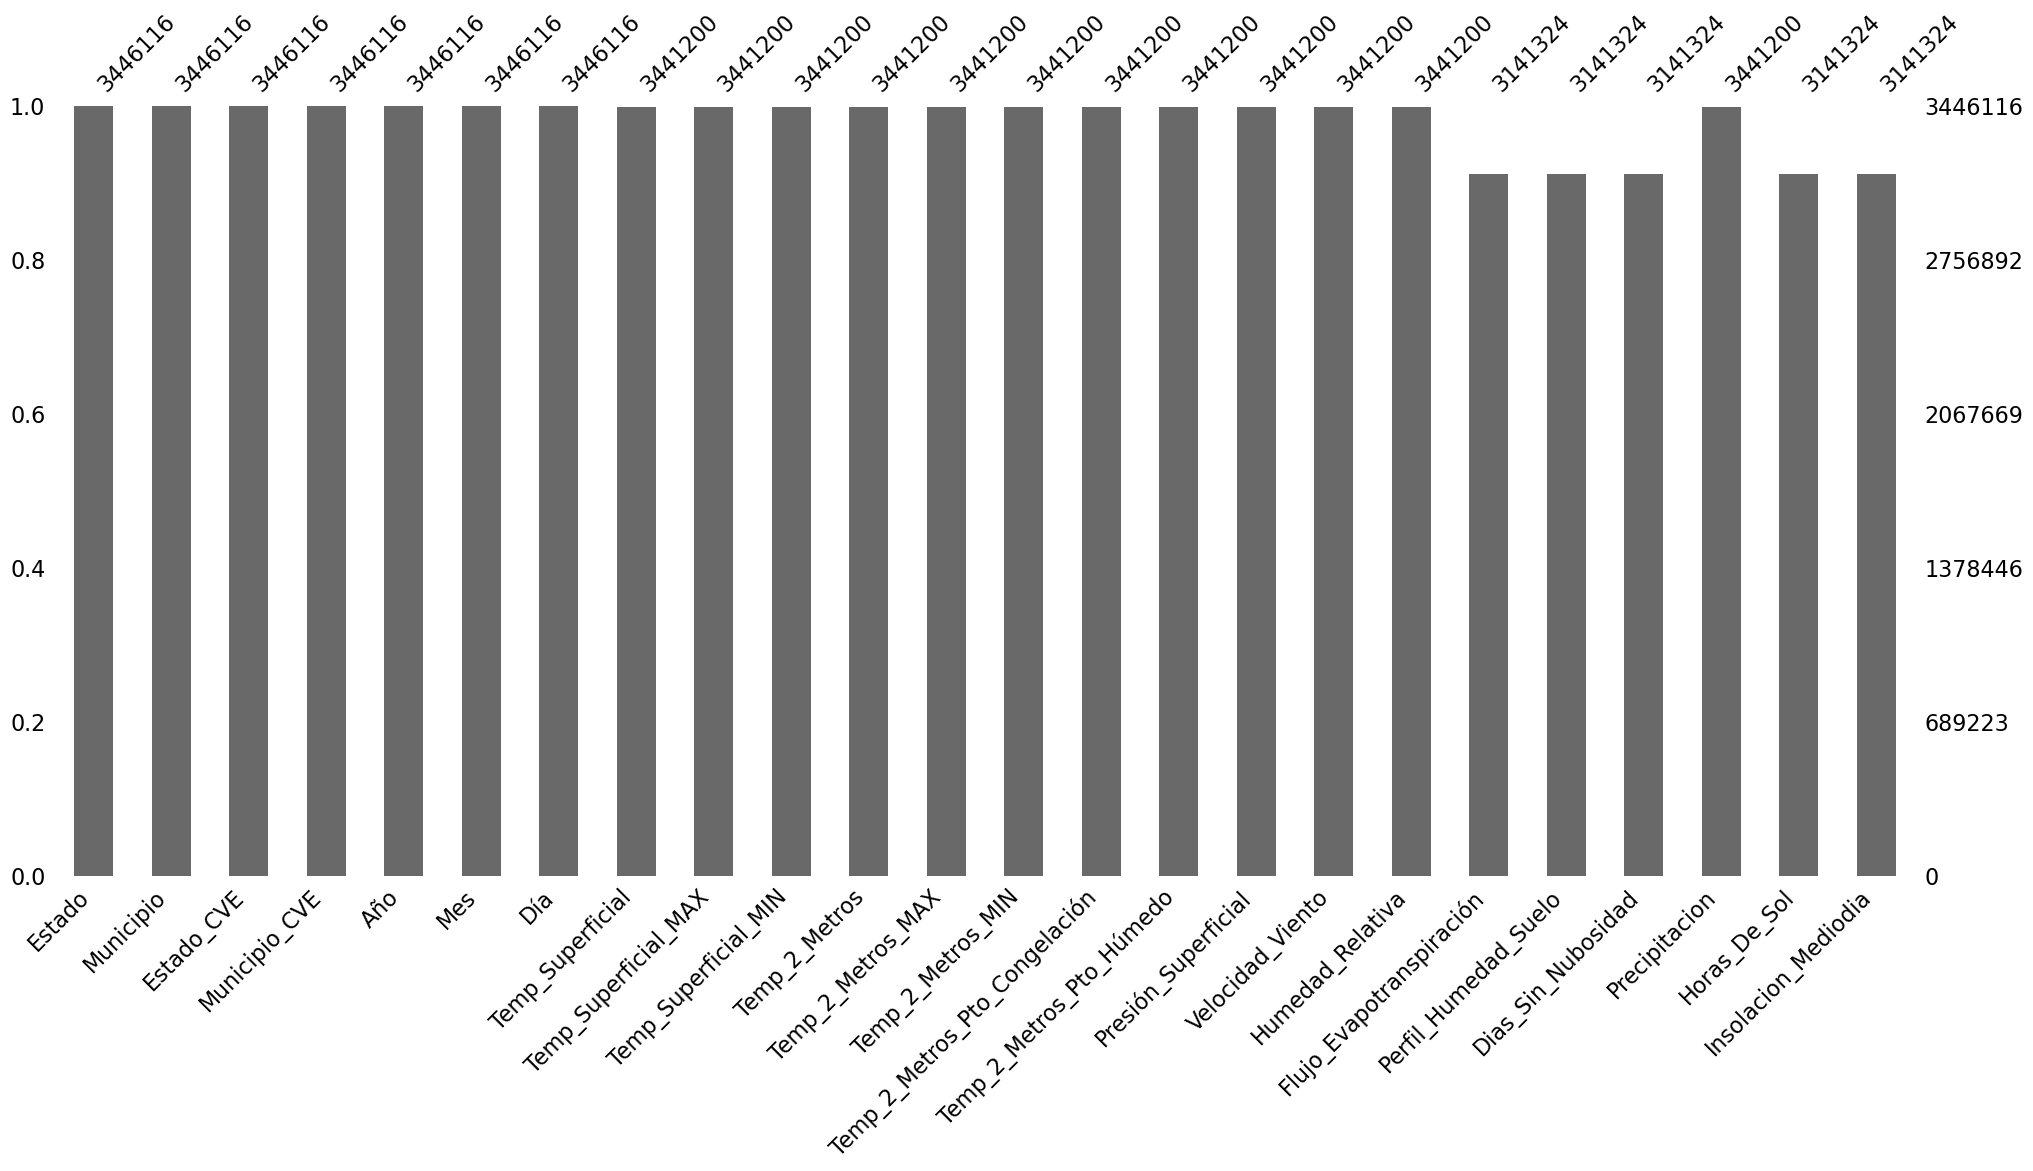

In [26]:
msno.bar(df)

<AxesSubplot: >

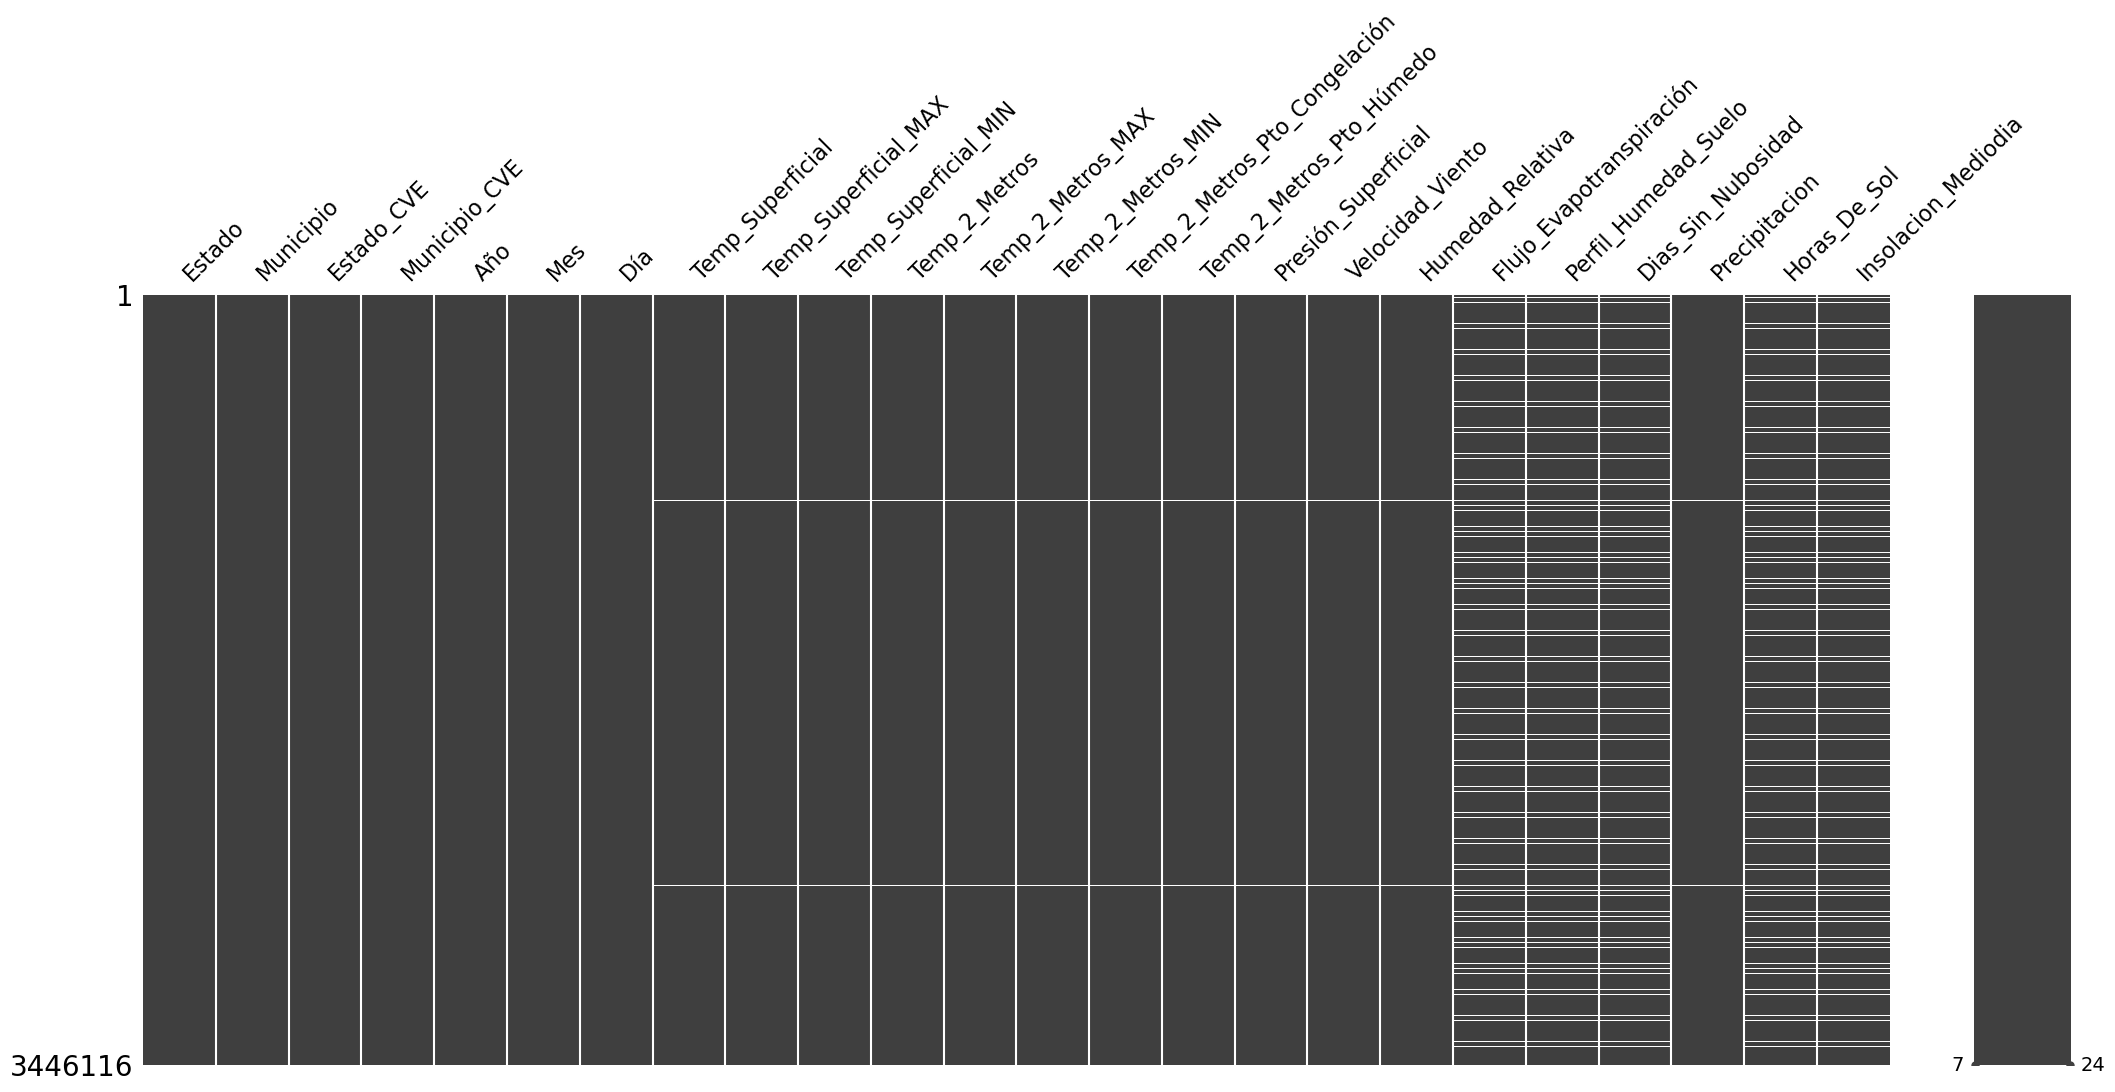

In [27]:
msno.matrix(df)

Las variables **Flujo_Evapotranspiración, Perfil_Humedad_Suelo, Dias_Sin_Nubosidad, Horas_De_Sol, Insolacion_Mediodi**  presentan valores faltantes hasta el mes de julio de 2023, por lo que se procederá a eliminarlos, ya que no se cuenta con la información necesaria para completarlos. Aunque se pierde información, se considera que es preferible eliminarlos a completarlos con datos que no corresponden a la realidad.

<AxesSubplot: >

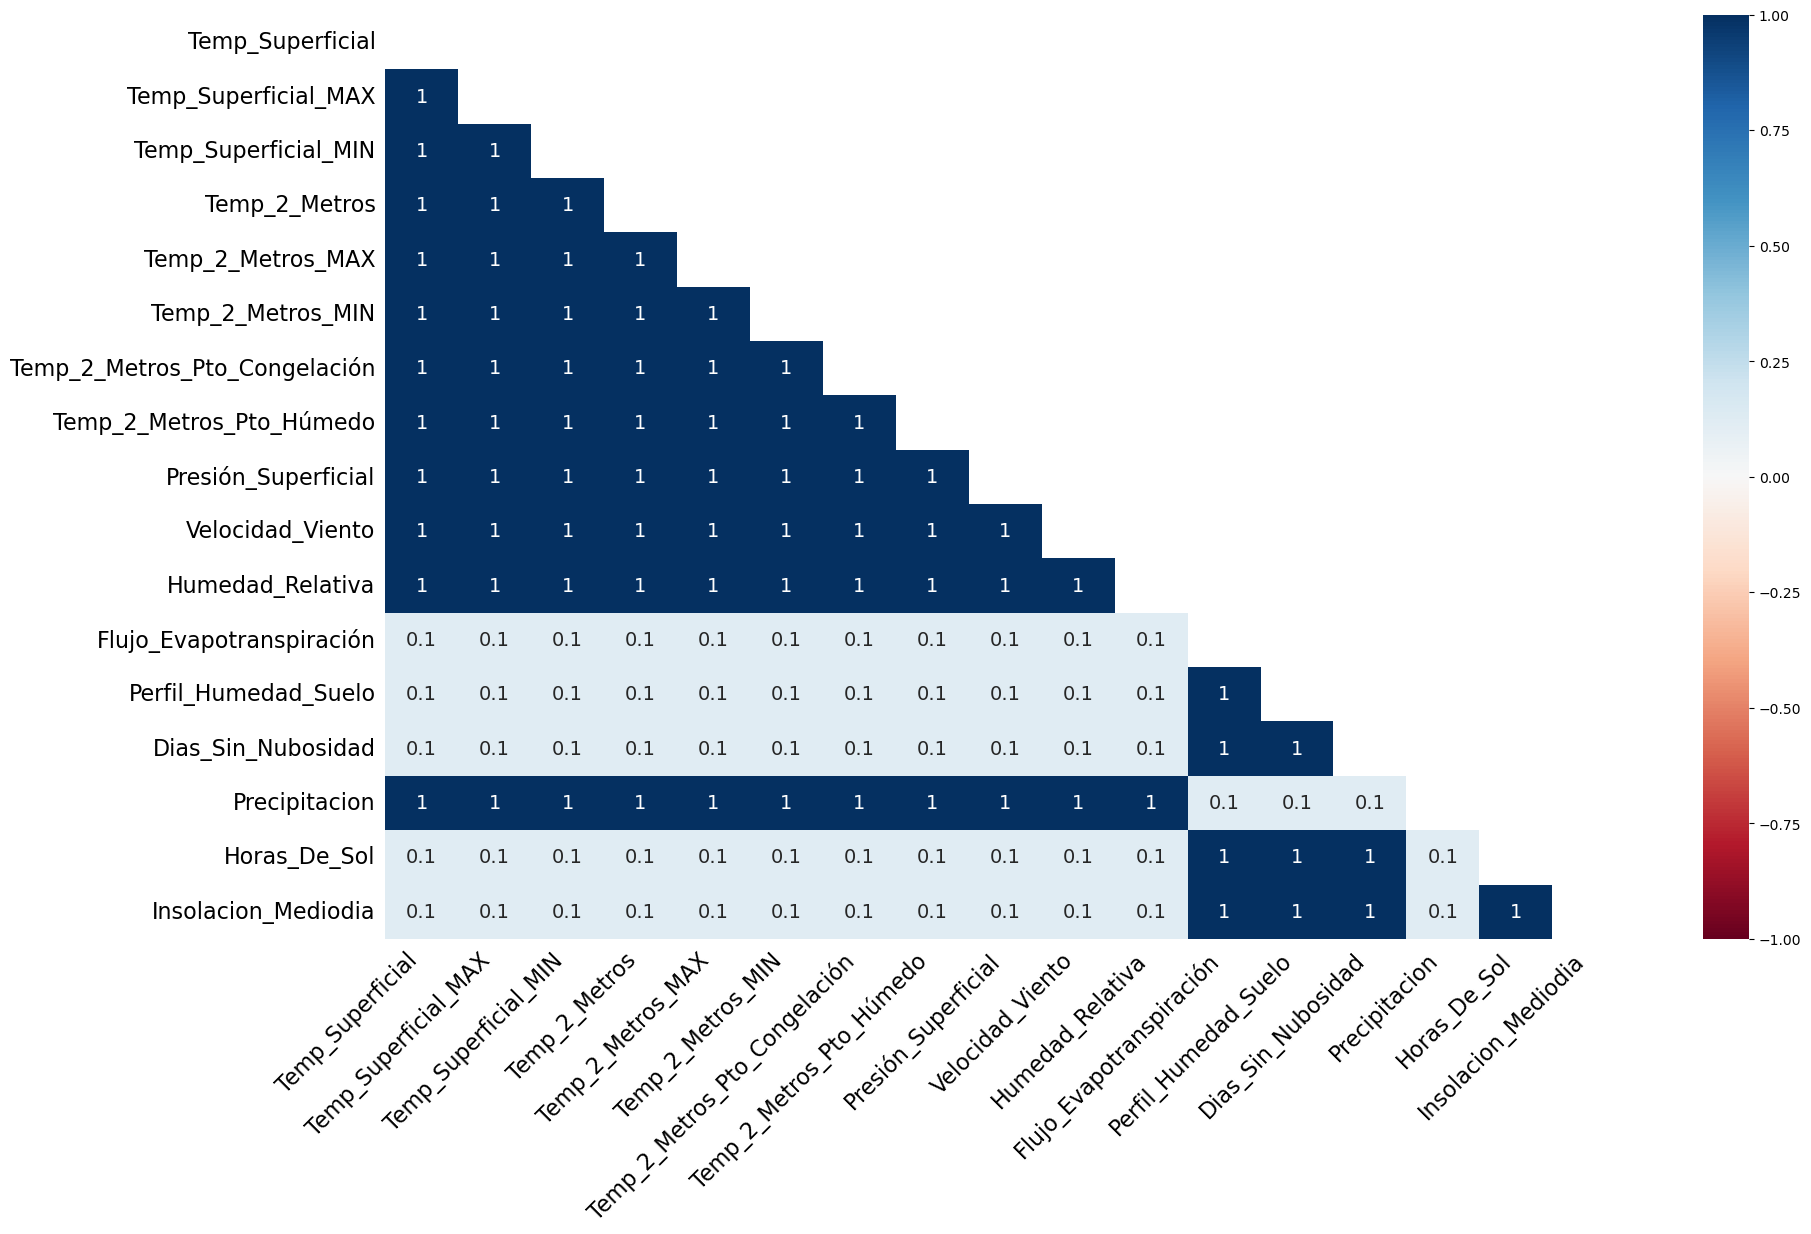

In [28]:
msno.heatmap(df)

<AxesSubplot: >

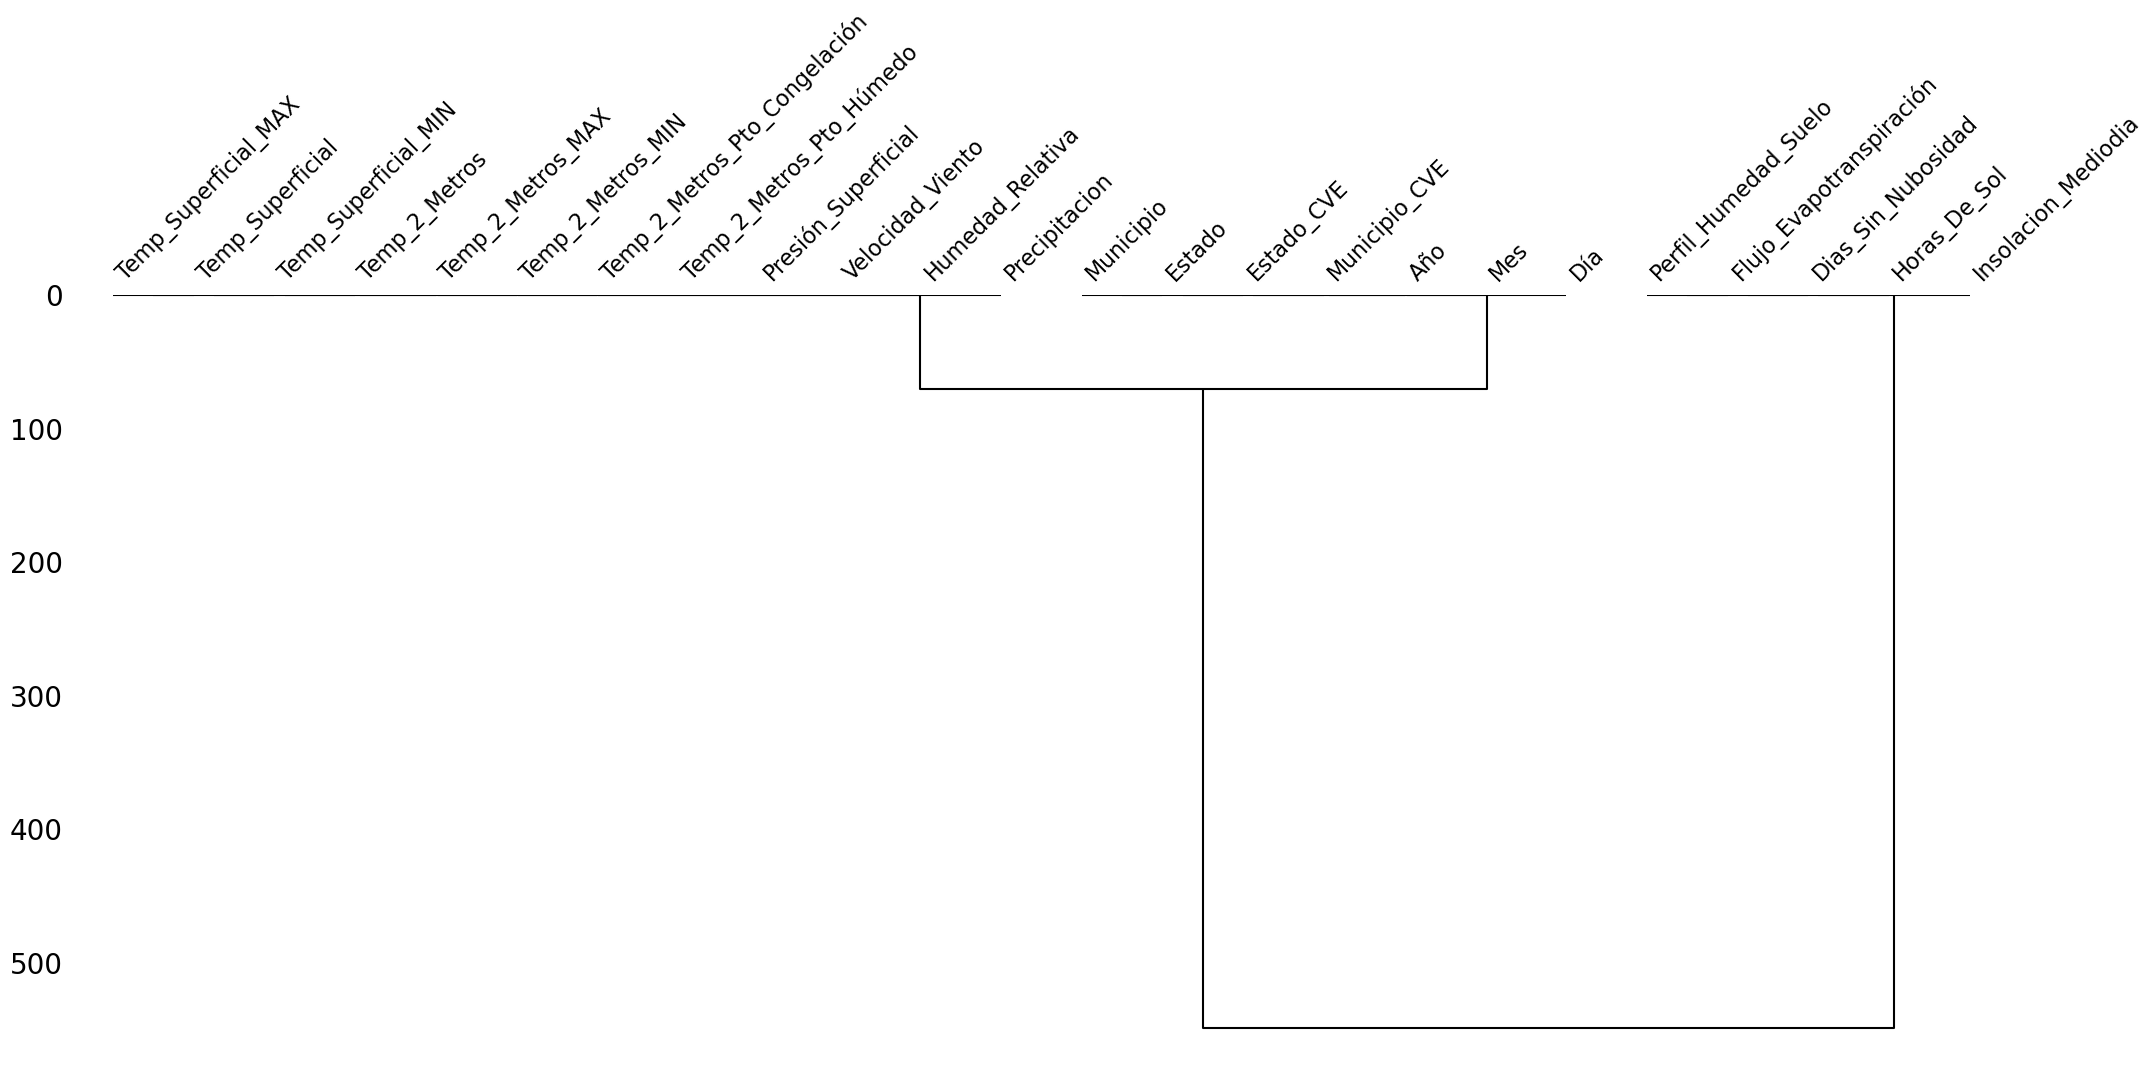

In [29]:
msno.dendrogram(df)

In [30]:
df.isnull().sum()

Estado                                0
Municipio                             0
Estado_CVE                            0
Municipio_CVE                         0
Año                                   0
Mes                                   0
Día                                   0
Temp_Superficial                   4916
Temp_Superficial_MAX               4916
Temp_Superficial_MIN               4916
Temp_2_Metros                      4916
Temp_2_Metros_MAX                  4916
Temp_2_Metros_MIN                  4916
Temp_2_Metros_Pto_Congelación      4916
Temp_2_Metros_Pto_Húmedo           4916
Presión_Superficial                4916
Velocidad_Viento                   4916
Humedad_Relativa                   4916
Flujo_Evapotranspiración         304792
Perfil_Humedad_Suelo             304792
Dias_Sin_Nubosidad               304792
Precipitacion                      4916
Horas_De_Sol                     304792
Insolacion_Mediodia              304792
dtype: int64

In [31]:
columnas_a_eliminar = ['Flujo_Evapotranspiración', 'Perfil_Humedad_Suelo', 'Dias_Sin_Nubosidad', 'Horas_De_Sol', 'Insolacion_Mediodia']
df = df.drop(columnas_a_eliminar, axis=1)
df.isnull().sum()

Estado                              0
Municipio                           0
Estado_CVE                          0
Municipio_CVE                       0
Año                                 0
Mes                                 0
Día                                 0
Temp_Superficial                 4916
Temp_Superficial_MAX             4916
Temp_Superficial_MIN             4916
Temp_2_Metros                    4916
Temp_2_Metros_MAX                4916
Temp_2_Metros_MIN                4916
Temp_2_Metros_Pto_Congelación    4916
Temp_2_Metros_Pto_Húmedo         4916
Presión_Superficial              4916
Velocidad_Viento                 4916
Humedad_Relativa                 4916
Precipitacion                    4916
dtype: int64

In [32]:
df.dropna(inplace=True)
df.isnull().sum()

Estado                           0
Municipio                        0
Estado_CVE                       0
Municipio_CVE                    0
Año                              0
Mes                              0
Día                              0
Temp_Superficial                 0
Temp_Superficial_MAX             0
Temp_Superficial_MIN             0
Temp_2_Metros                    0
Temp_2_Metros_MAX                0
Temp_2_Metros_MIN                0
Temp_2_Metros_Pto_Congelación    0
Temp_2_Metros_Pto_Húmedo         0
Presión_Superficial              0
Velocidad_Viento                 0
Humedad_Relativa                 0
Precipitacion                    0
dtype: int64

In [33]:
df[df.duplicated()] # No hay duplicados

,Estado,Municipio,Estado_CVE,Municipio_CVE,Año,Mes,Día,Temp_Superficial,Temp_Superficial_MAX,Temp_Superficial_MIN,Temp_2_Metros,Temp_2_Metros_MAX,Temp_2_Metros_MIN,Temp_2_Metros_Pto_Congelación,Temp_2_Metros_Pto_Húmedo,Presión_Superficial,Velocidad_Viento,Humedad_Relativa,Precipitacion


### Crea Dataframe Estatal inferido a partir del Municipal

In [ ]:
df_estatal1 = df_combinado.groupby(['Año','Mes','Estado', 'Estado_CVE']).mean().reset_index()
df_estatal1.drop(columns=['Día','Municipio_CVE'], inplace=True)

columnas_numericas = df_estatal1.select_dtypes(include=[np.number]).columns # Seleccionar solo las columnas numéricas
df_estatal1[columnas_numericas] = df_estatal1[columnas_numericas].round(2) # Redondear las columnas numéricas a dos decimales

print(df_estatal1.shape)
#df_estatal1.to_csv('data/Estados/Data_Climatic_Estados_Inferido.csv', index=False)
df_estatal1

'sum': Suma de los valores.
'mean': Media aritmética.
'median': Mediana.
'min': Valor mínimo.
'max': Valor máximo.
'count': Número de elementos no nulos.
'nunique': Número de valores únicos.
'first': Primer valor no nulo.
'last': Último valor no nulo.
'std': Desviación estándar.
'var': Varianza.
'prod': Producto de los valores.
'sem': Error estándar de la media.
'mode': Moda.
'size': Número total de elementos.

### Funciones de Agregacion especificas

In [ ]:
# Diccionario de funciones de agregación por columna
aggregation_functions = {
    'Temp_Superficial': 'mean',
    'Temp_Superficial_MAX': 'mean',
    'Temp_Superficial_MIN': 'mean', 
    'Temp_2_Metros': 'mean', 
    'Temp_2_Metros_MAX': 'mean', 
    'Temp_2_Metros_MIN': 'mean',
    'Temp_2_Metros_Pto_Congelación': 'mean', 
    'Temp_2_Metros_Pto_Húmedo': 'mean', 
    'Presión_Superficial': 'mean',
    'Velocidad_Viento': 'mean', 
    'Humedad_Relativa': 'mean', 
    'Flujo_Evapotranspiración': 'mean', 
    'Perfil_Humedad_Suelo': 'mean',
    'Dias_Sin_Nubosidad': 'mean', 
    'Precipitacion': 'mean', 
    'Horas_De_Sol': 'mean', 
    'Insolacion_Mediodia': 'mean'
}

# Agrupar por Estado y aplicar las funciones de agregación especificadas
df_estatal = df_combinado.groupby(['Año','Mes','Estado', 'Estado_CVE']).agg(aggregation_functions).reset_index()

columnas_numericas = df_estatal1.select_dtypes(include=[np.number]).columns # Seleccionar solo las columnas numéricas
df_estatal1[columnas_numericas] = df_estatal1[columnas_numericas].round(2) # Redondear las columnas numéricas a dos decimales

#df_estatal.drop(columns=['Día','Municipio_CVE'], inplace=True)
df_estatal
